## Jose Luis Ropero
## Jose Luis Rueda 


# Carga de Datos 


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import MinMaxScaler


In [96]:


# Cargar archivo CSV
df_train= pd.read_csv("data/train.csv")
df_test= pd.read_csv("data/test.csv")
y_test = pd.read_csv("data\sample_submission.csv")

# Mostrar las primeras 5 filas
print(df_train.head())

# Mostrar información general del DataFrame
print(df_train.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rueda\AppData\Local\Temp\ipykernel_10360\3426378862.py:4: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv("data\sample_submission.csv")


In [97]:
print(df_test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [98]:
df_test_total = pd.concat([df_test, y_test], axis=1)  # axis=1 para unir columnas

print(df_train.index.is_unique)
print(df_test_total.index.is_unique)

True
True


In [99]:
df_test_total = df_test_total.drop(columns=['Id'])

In [100]:
df_total = pd.concat([df_train, df_test_total], ignore_index=True)
print("Total de datos",df_total.shape)
df_total.columns

Total de datos (2919, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Preprocesamiento de los datos

In [101]:
print(df_total.head())

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0          60       RL         65.0     8450   Pave   NaN      Reg   
1  2.0          20       RL         80.0     9600   Pave   NaN      Reg   
2  3.0          60       RL         68.0    11250   Pave   NaN      IR1   
3  4.0          70       RL         60.0     9550   Pave   NaN      IR1   
4  5.0          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008       

In [102]:
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [118]:
print(df_train.dtypes)
columnas_por_tipo = df_total.columns.to_series().groupby(df_total.dtypes).groups
for tipo, columnas in columnas_por_tipo.items():
    print(f"Columnas de tipo {tipo}:")
    print(columnas.tolist())

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Columnas de tipo int64:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Columnas de tipo float64:
['Id', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
Columnas de tipo object:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neig

### Eliminación de columnas

Vemos las columnas categoricas 

In [104]:
columnas_categoricas= df_total.select_dtypes(include=["object"])
#print(columnas_categoricas.head())

for col in columnas_categoricas:
    print(f"Valores diferentes en {col}: {df_total[col].nunique()}")

Valores diferentes en MSZoning: 5
Valores diferentes en Street: 2
Valores diferentes en Alley: 2
Valores diferentes en LotShape: 4
Valores diferentes en LandContour: 4
Valores diferentes en Utilities: 2
Valores diferentes en LotConfig: 5
Valores diferentes en LandSlope: 3
Valores diferentes en Neighborhood: 25
Valores diferentes en Condition1: 9
Valores diferentes en Condition2: 8
Valores diferentes en BldgType: 5
Valores diferentes en HouseStyle: 8
Valores diferentes en RoofStyle: 6
Valores diferentes en RoofMatl: 8
Valores diferentes en Exterior1st: 15
Valores diferentes en Exterior2nd: 16
Valores diferentes en MasVnrType: 3
Valores diferentes en ExterQual: 4
Valores diferentes en ExterCond: 5
Valores diferentes en Foundation: 6
Valores diferentes en BsmtQual: 4
Valores diferentes en BsmtCond: 4
Valores diferentes en BsmtExposure: 4
Valores diferentes en BsmtFinType1: 6
Valores diferentes en BsmtFinType2: 6
Valores diferentes en Heating: 6
Valores diferentes en HeatingQC: 5
Valores d

Vemos las columnas Numericas

In [105]:
df_total.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,730.500000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,421.610009,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,730.500000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,1095.250000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Eliminaciónn de filas iguales 

In [106]:
print("Antes", df_total.shape)
df_total.drop_duplicates(inplace=True)
print("Despues",df_total.shape)
print("No se encontraron filas duplicadas")

Antes (2919, 81)
Despues (2919, 81)
No se encontraron filas duplicadas


### Eliminación de Outliers 

In [107]:
columnas_numericas = df_total.select_dtypes(include=["int64", "int32", "float64", "float32"])
print(columnas_numericas.shape)

(2919, 38)


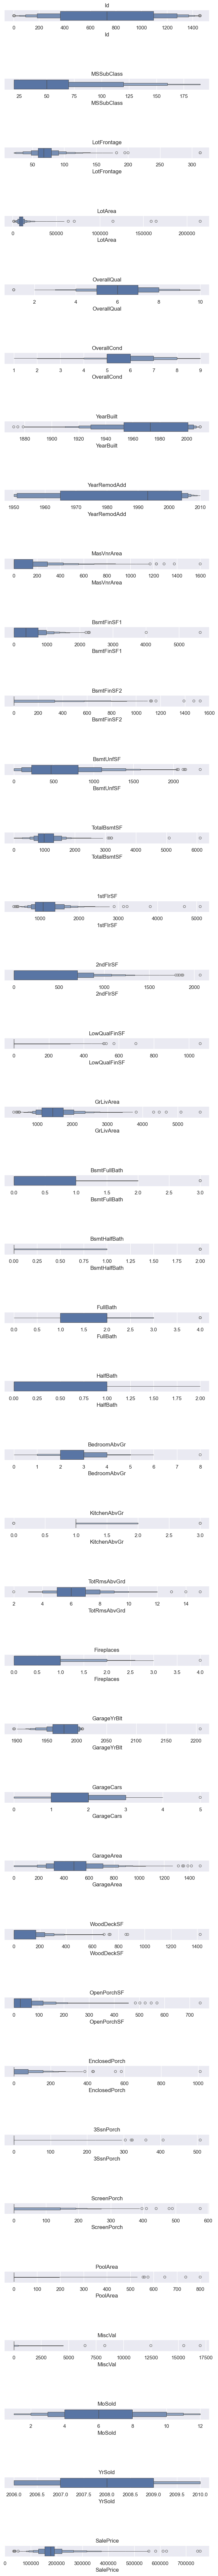

In [108]:
fig, ax = plt.subplots(nrows=columnas_numericas.shape[1], ncols=1, figsize=(8, 100))
fig.subplots_adjust(hspace=5, wspace=0.5)

for i, col in enumerate(columnas_numericas):
    sns.boxenplot(x=df_total[col], ax=ax[i])
    ax[i].set_title(col)
    

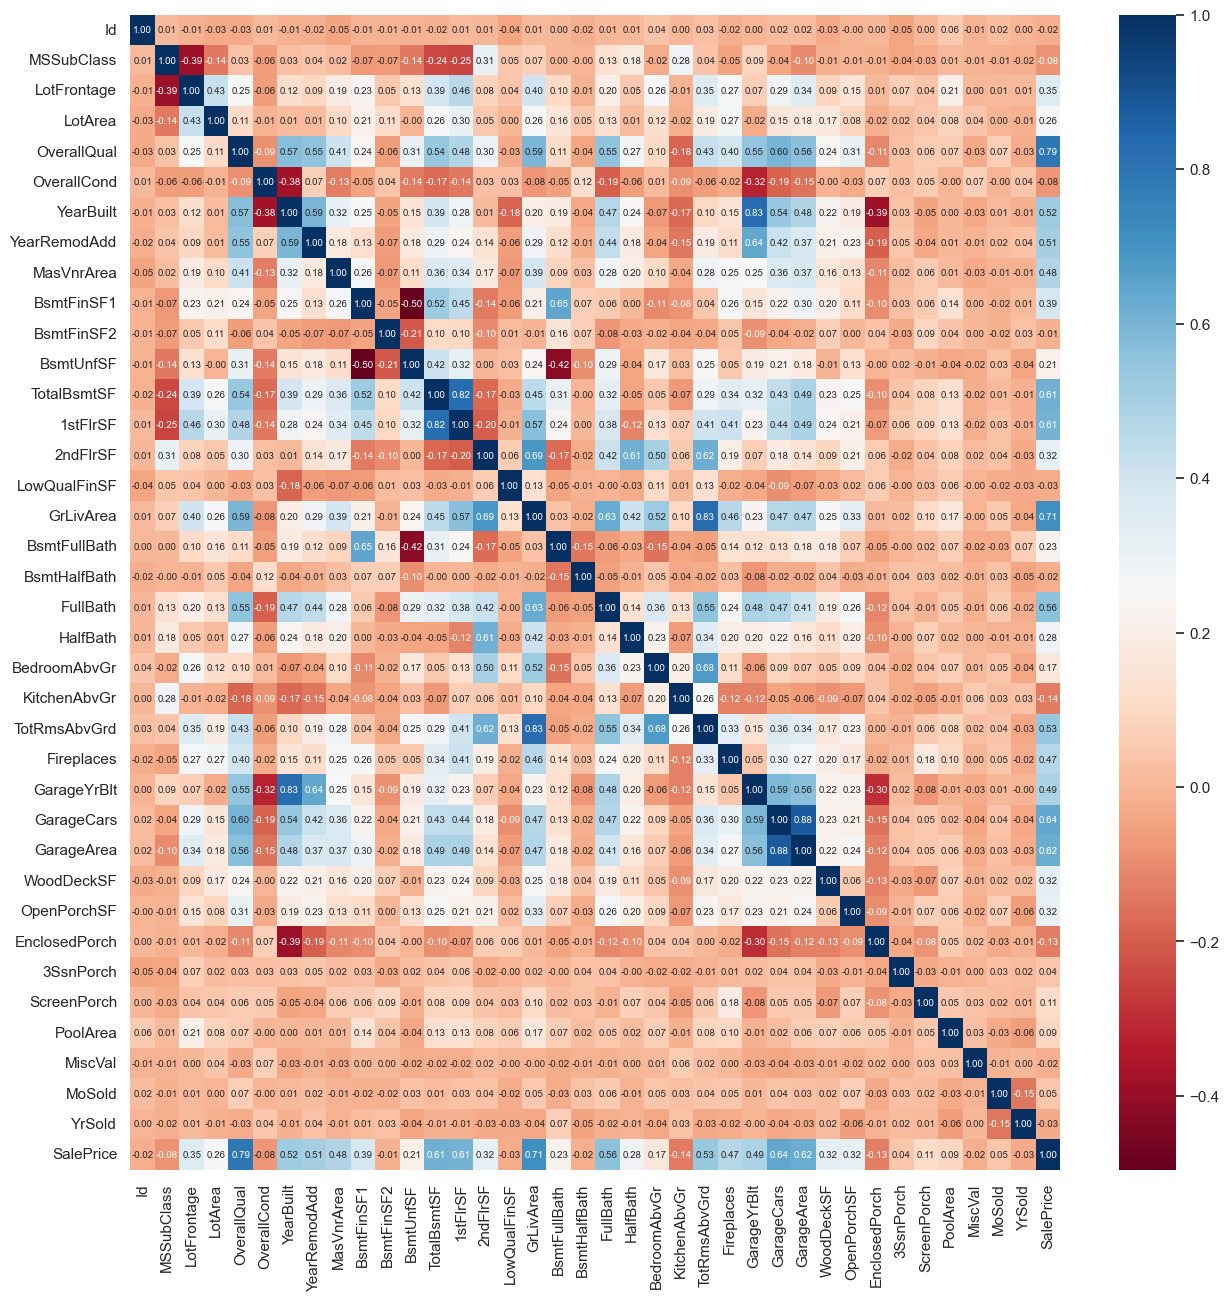

[]

In [125]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", annot_kws={"size": 7})
        plt.show()
    return drop_list

high_correlated_cols(df_train, plot=True)

### Para sacar las caracteristicas con mayor correlación

In [121]:
def most_relevant_features(dataframe, target_column, threshold=0.2): 
    correlations = dataframe.corr(numeric_only=True)[target_column]
    relevant_features = correlations[correlations.abs() > threshold].sort_values(ascending=False)
    return relevant_features

relevant_features = most_relevant_features(df_train, target_column="SalePrice", threshold=0.4)
print(relevant_features)



SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64


In [112]:
selected_columns = relevant_features.index.tolist()
df_varNuImport = df_total[selected_columns]
print(df_varNuImport.head())

   SalePrice  GrLivArea  OverallQual  TotRmsAbvGrd  GarageCars  GarageArea  \
0   208500.0       1710            7             8         2.0       548.0   
1   181500.0       1262            6             6         2.0       460.0   
2   223500.0       1786            7             6         2.0       608.0   
3   140000.0       1717            7             7         3.0       642.0   
4   250000.0       2198            8             9         3.0       836.0   

   1stFlrSF  TotalBsmtSF  FullBath  
0       856        856.0         2  
1      1262       1262.0         2  
2       920        920.0         2  
3       961        756.0         1  
4      1145       1145.0         2  


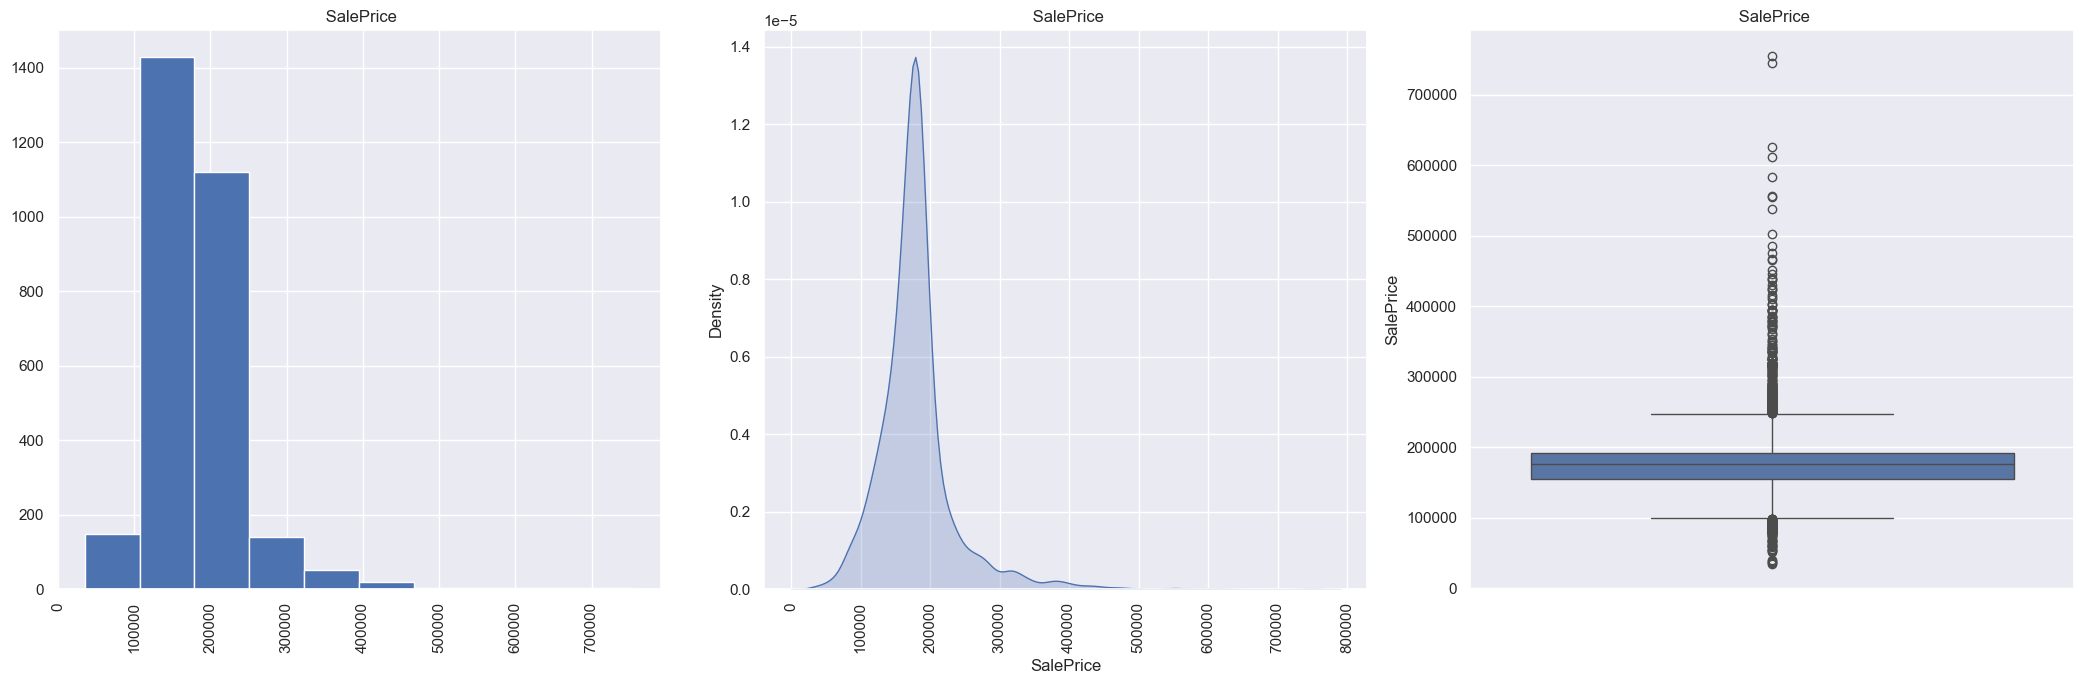

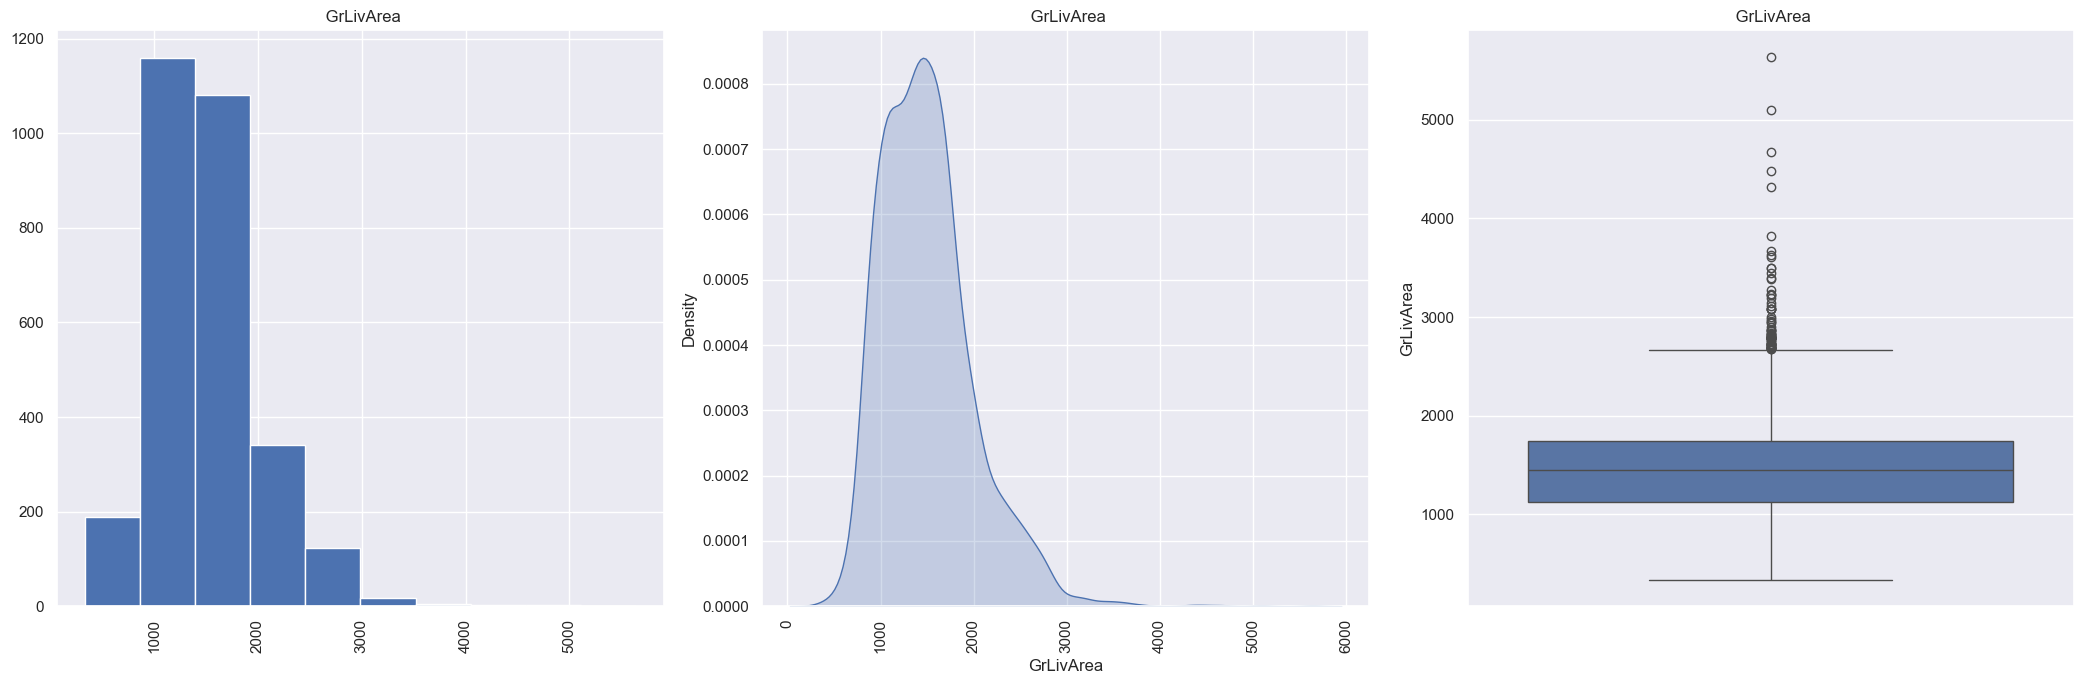

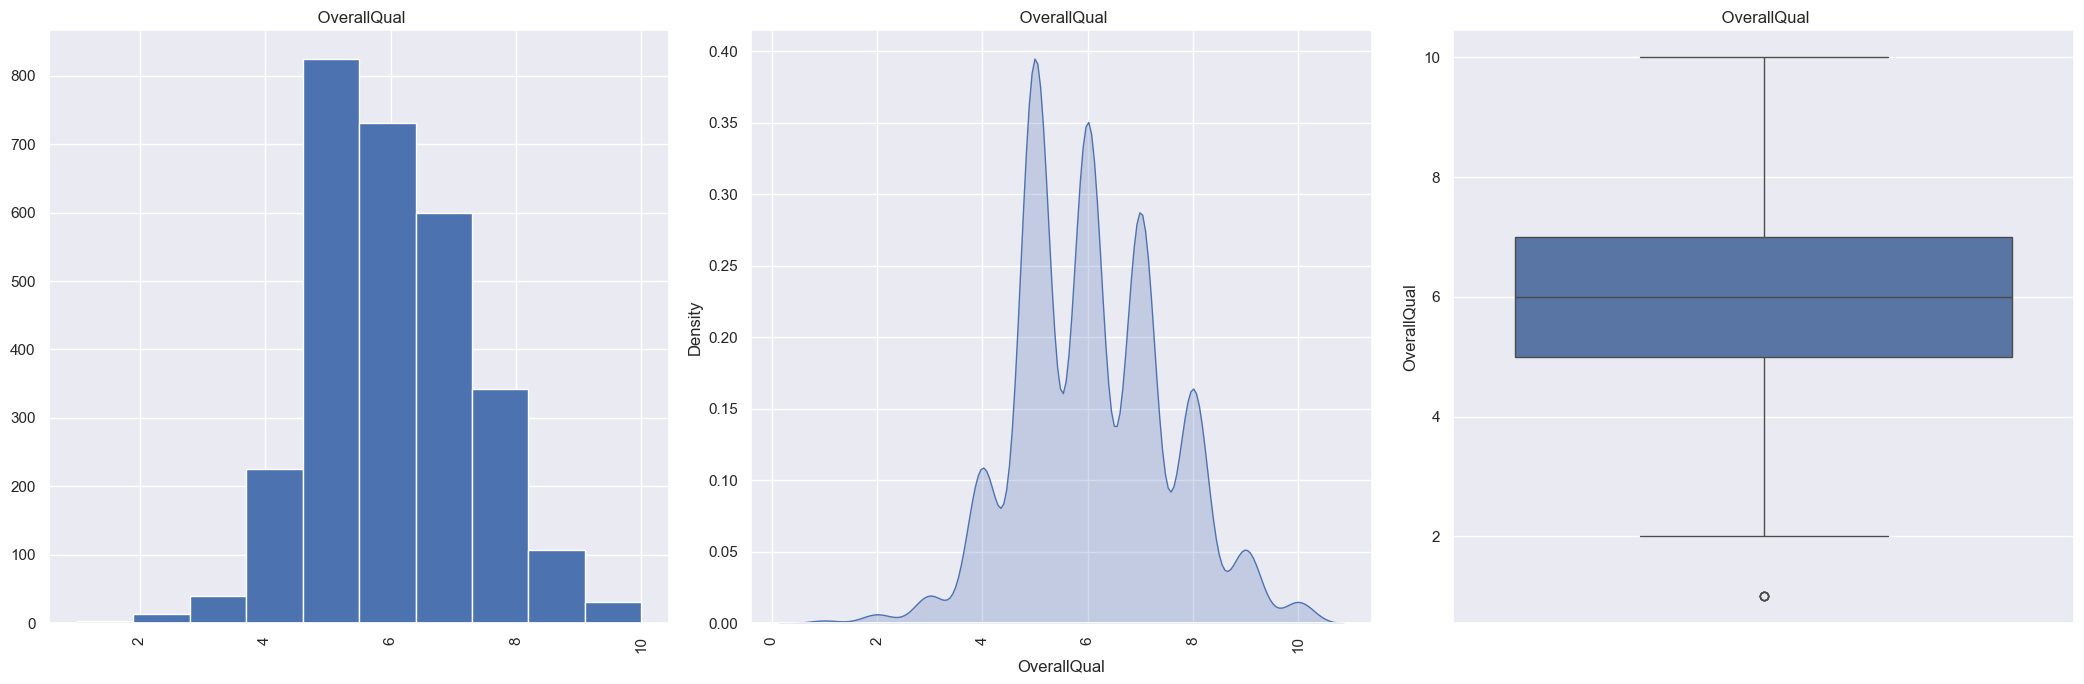

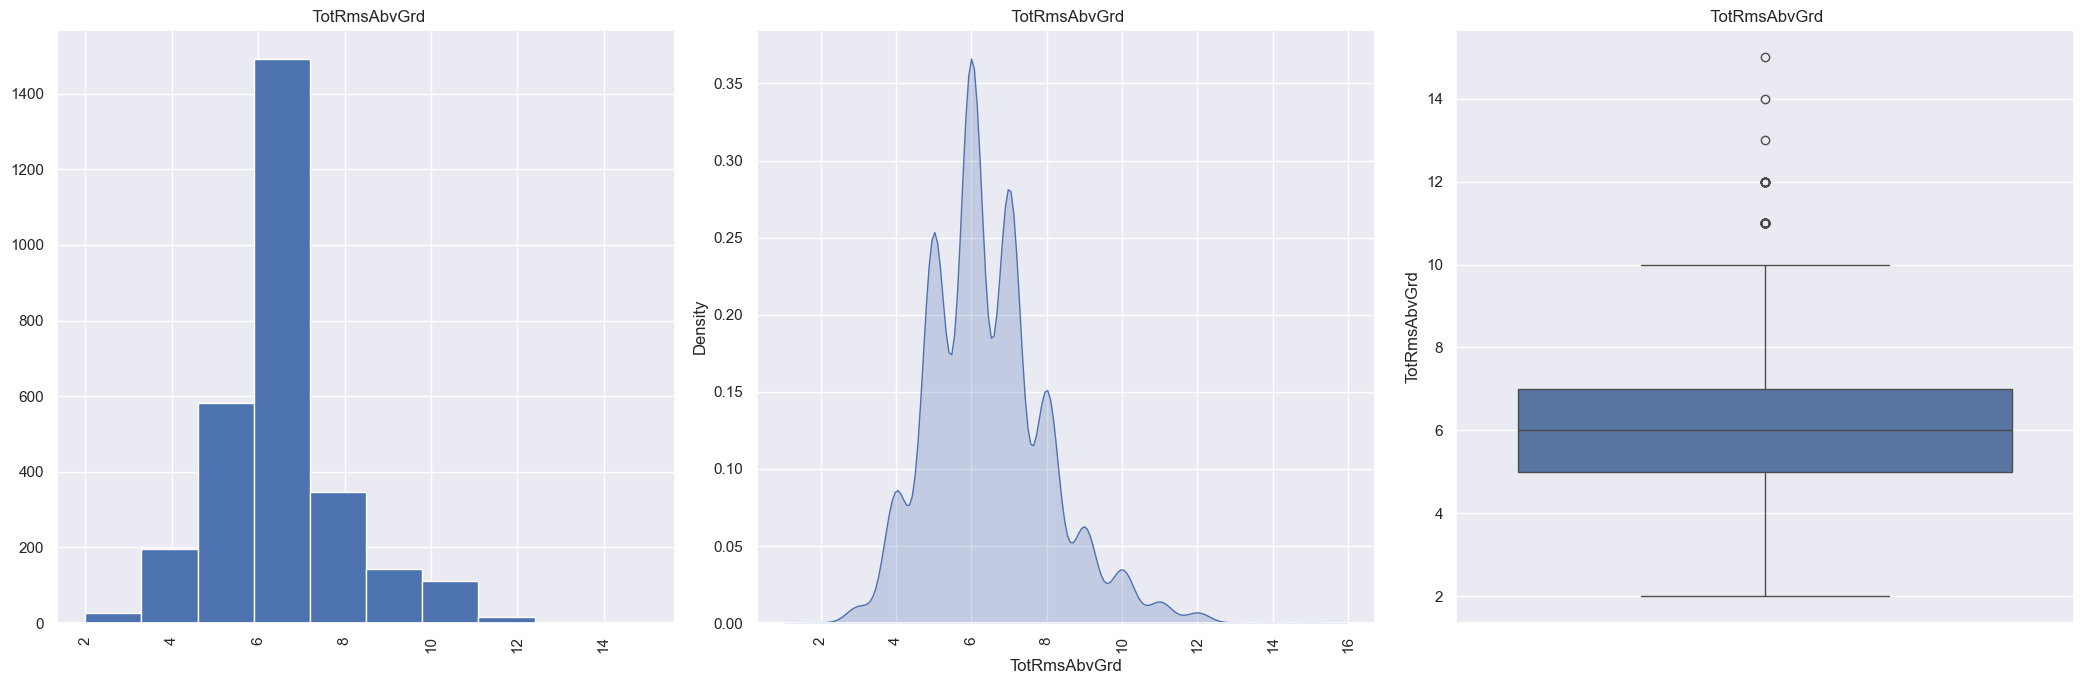

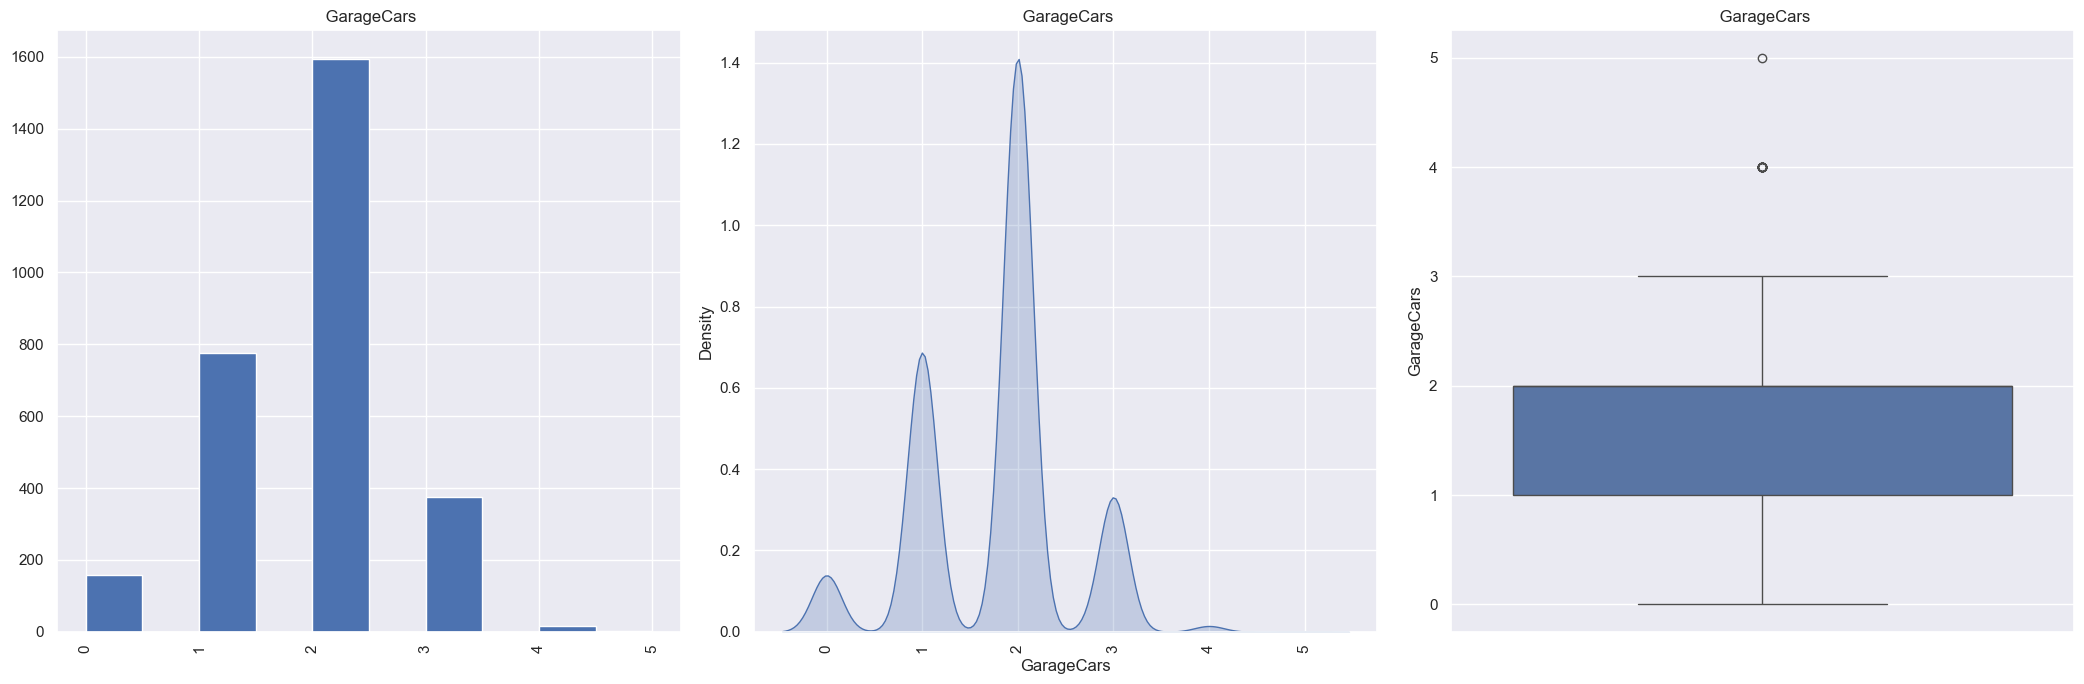

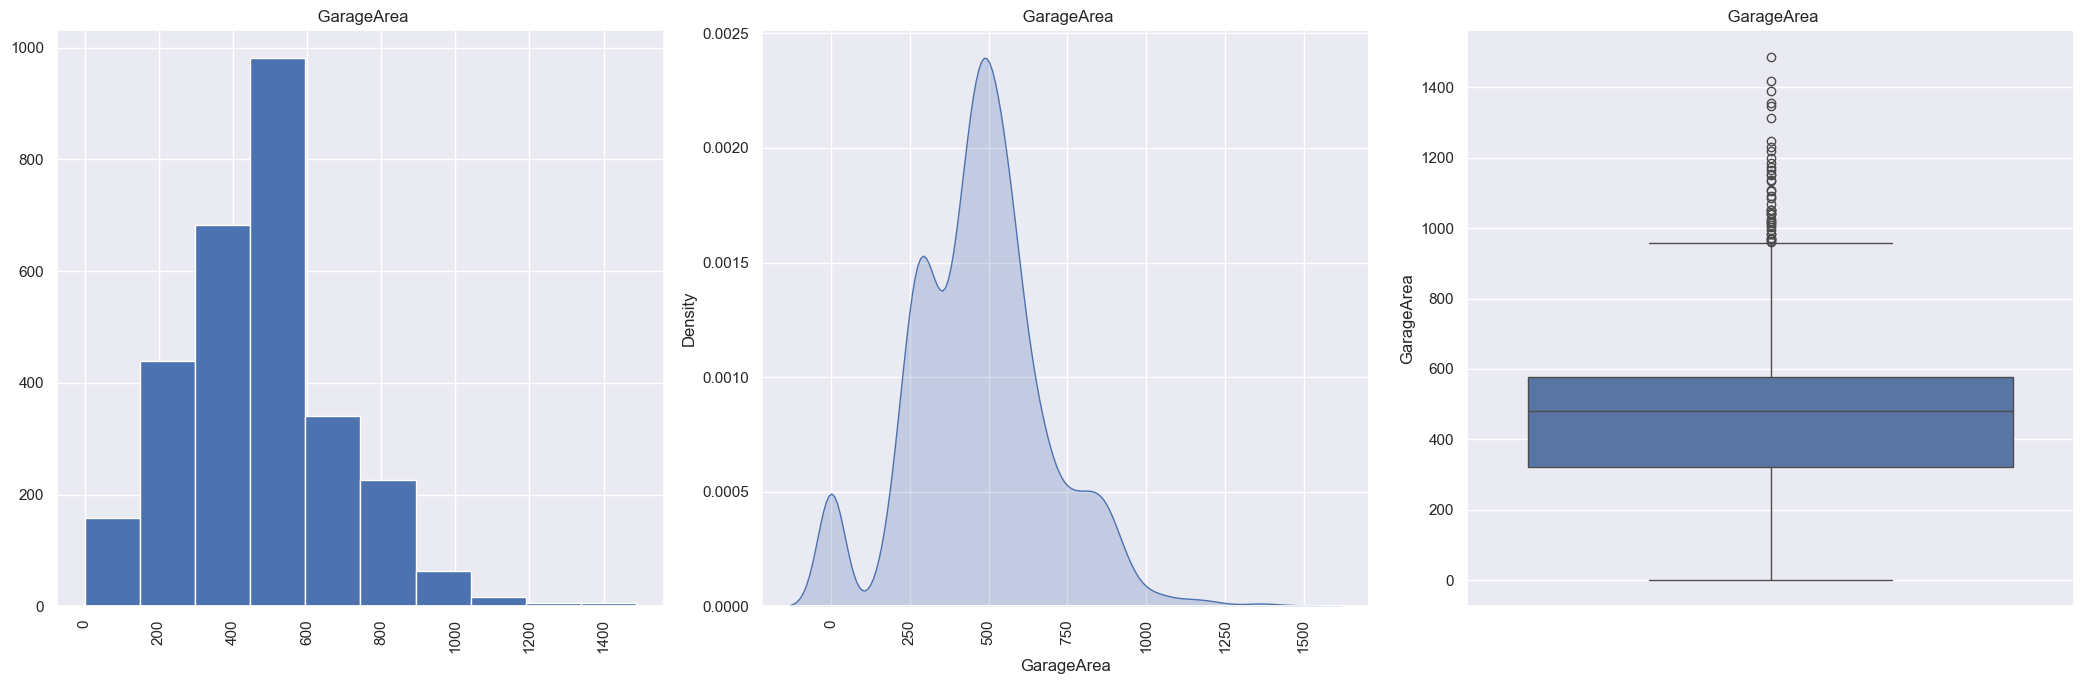

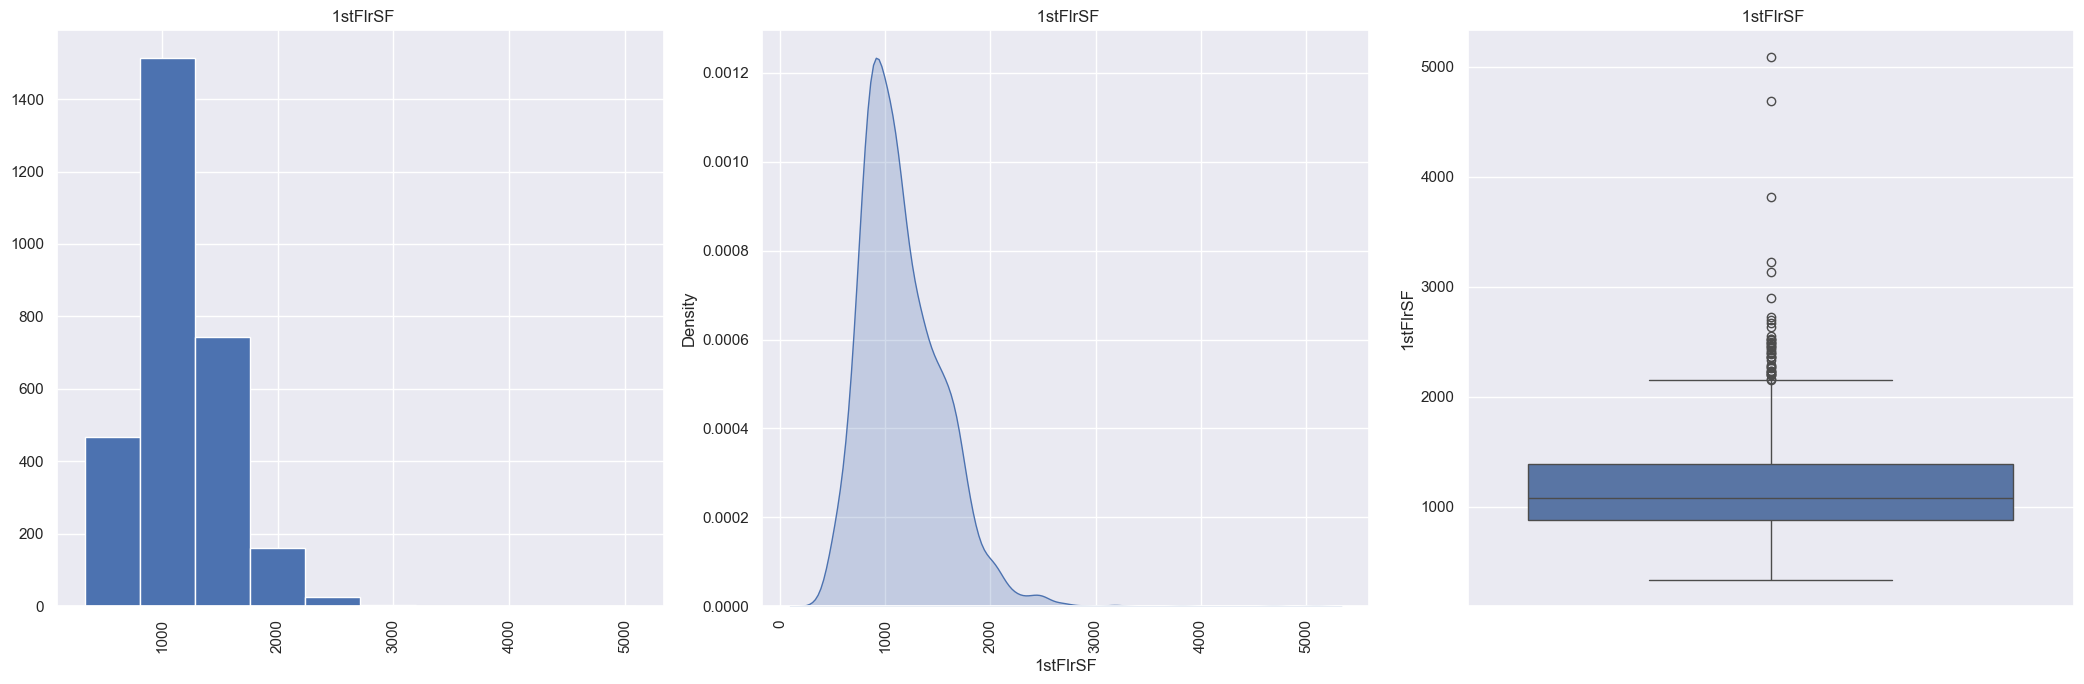

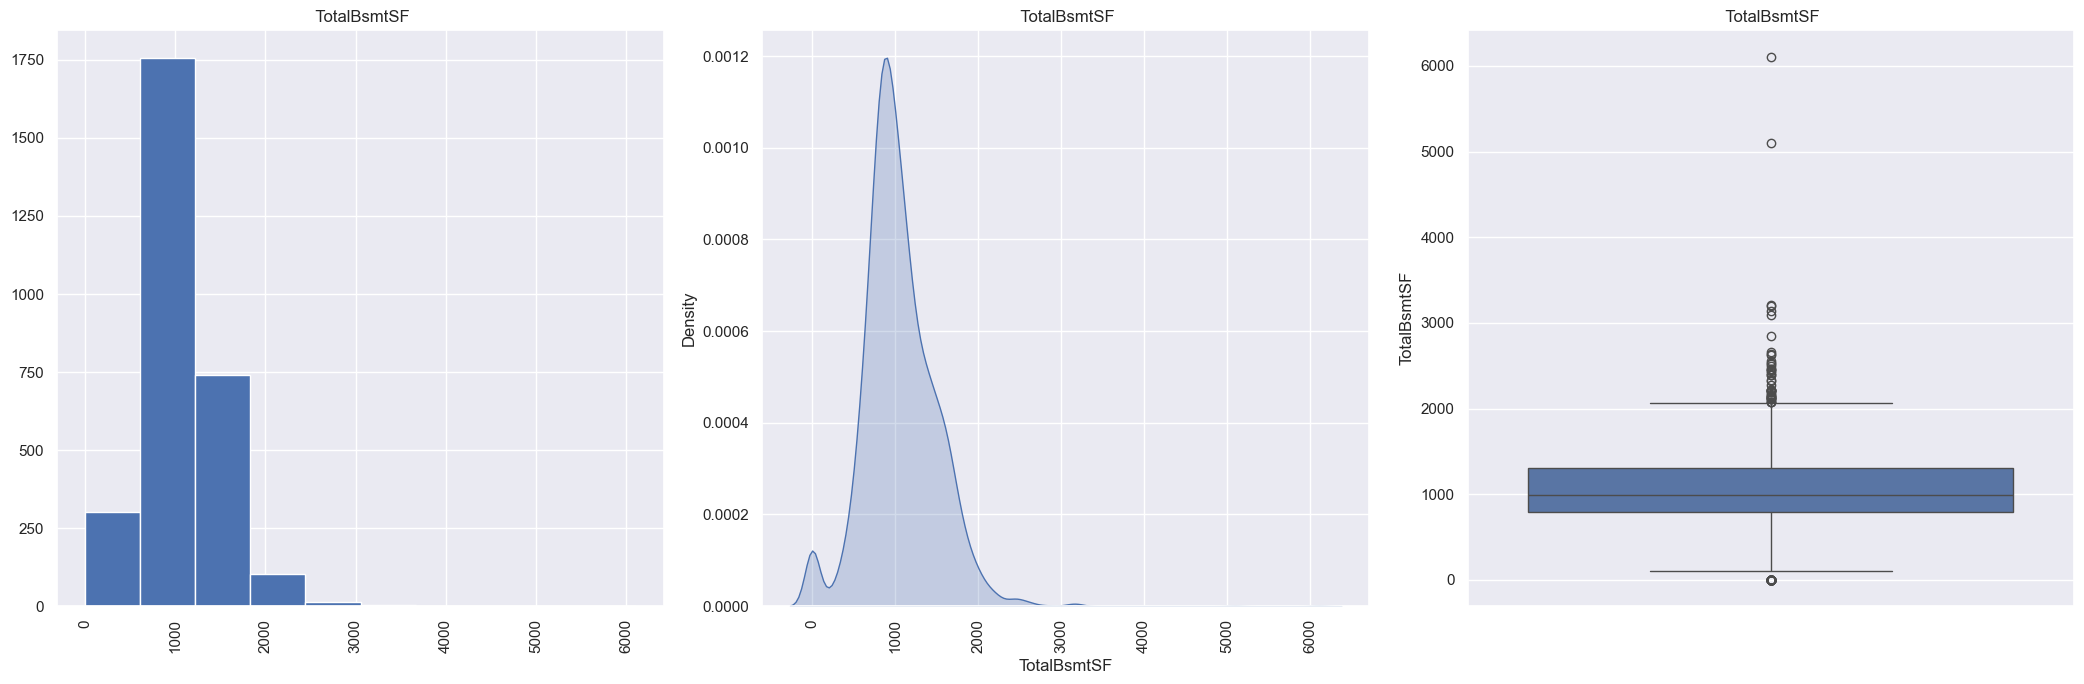

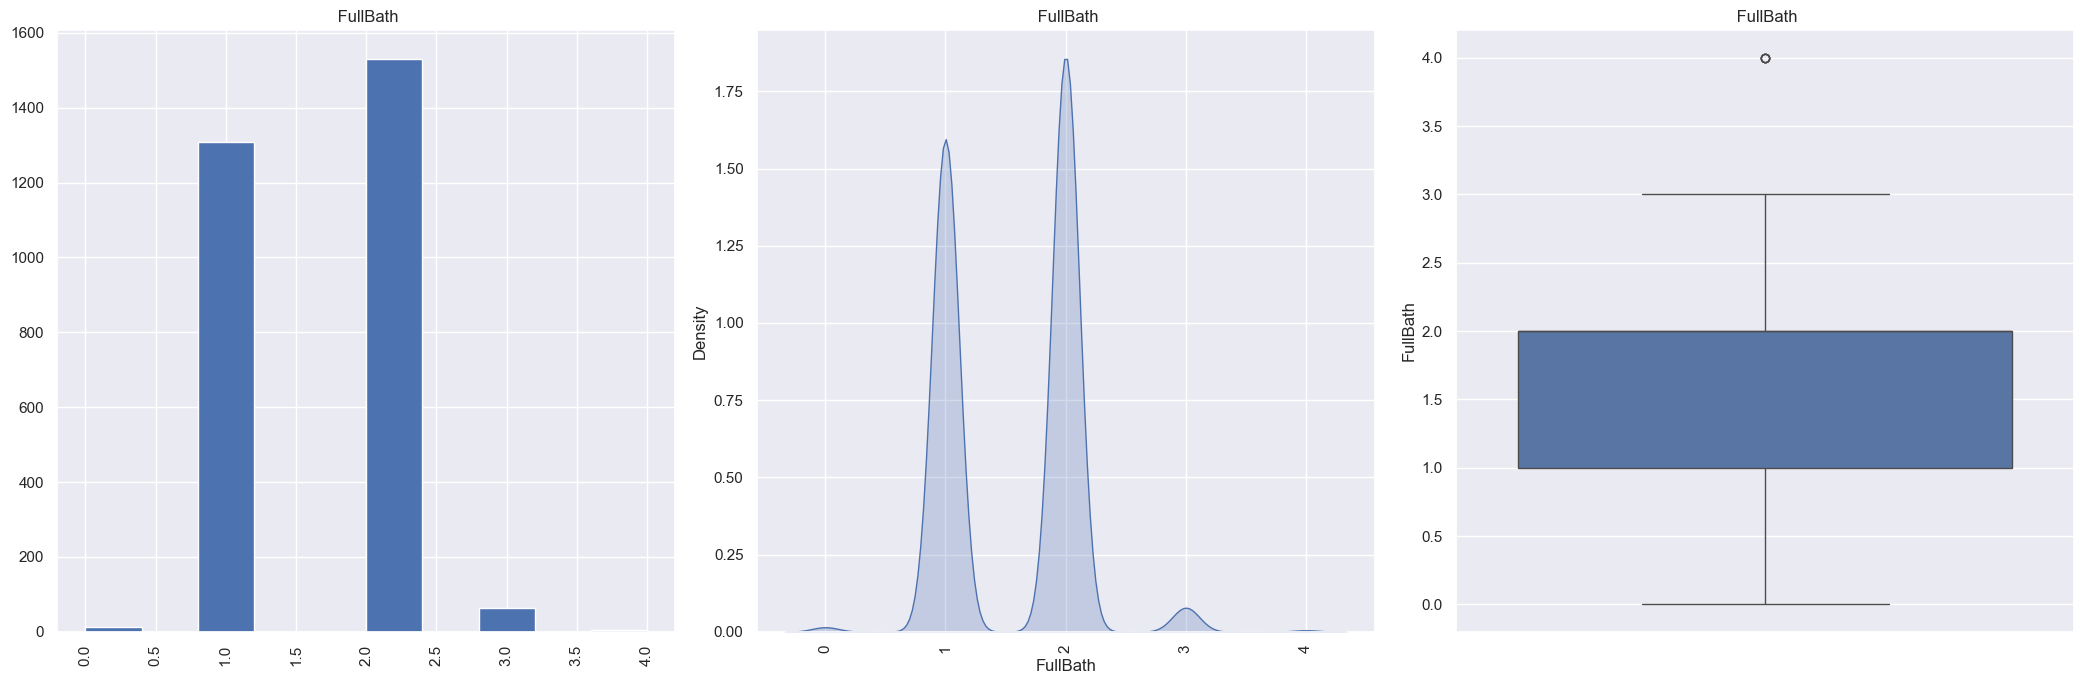

In [113]:
for col in df_varNuImport.columns:
    plt.figure(figsize=(21,7))
    
    plt.subplot(1,3,1)
    df_varNuImport[col].hist()
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)
    sns.kdeplot(df_varNuImport[col], fill=True)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=col, data=df_varNuImport)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

In [114]:
# Verificar si hay valores faltantes en el DataFrame
missing_values = df_varNuImport.isnull().sum()

# Filtrar columnas con datos faltantes
missing_columns = missing_values[missing_values > 0]

print("Datos faltantes por columna:")
print(missing_columns)

# Si no hay datos faltantes
if missing_columns.empty:
    print("No hay datos faltantes en las columnas seleccionadas.")
else:
    print(f"Hay {missing_columns.sum()} valores faltantes en total.")


Datos faltantes por columna:
GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64
Hay 3 valores faltantes en total.


### Tratamiento de Variables Categoricas 

In [115]:
def label_encoder (dataframe, binary_col):
    dataframe[binary_col]= LabelEncoder().fit_transform(dataframe[binary_col])
    return dataframe

binary_cols=[col for col in df_total.columns if df_total[col].dtypes == "O" and df_total[col].nunique()==2]

In [116]:
def one_hot_encoder (dataframe, categorical_cols, drop_first=False):
    dataframe=pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
# categorical_cols=[col for col in cat_cols if col not in binary_cols]
# df=one_hot_encoder(df, categorical_cols, True)
# df=df.apply(lambda x: x.astype(int) if x.dtypes=="bool" else x)
# df.head()

NameError: name 'cat_cols' is not defined